In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
import matplotlib.pyplot as plt

In [66]:
# Завантаження датасету IMDb та підготовка даних
max_features = 10000  # Максимальна кількість слів у словнику
max_len = 200  # Максимальна довжина рецензії
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [67]:
# Створення та тренування різних рекурентних моделей
models = []


In [68]:
# Модель з простим RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models.append(('RNN', model_rnn))

In [69]:
# Модель з LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models.append(('LSTM', model_lstm))

In [70]:
# Модель з Bidirectional LSTM
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model_bidirectional.add(Bidirectional(LSTM(128)))
model_bidirectional.add(Dense(1, activation='sigmoid'))
model_bidirectional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models.append(('Bidirectional LSTM', model_bidirectional))

In [71]:
# Тренування та оцінка моделей
results = []

for name, model in models:
    print(f'Training {name}...')
    history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)
    results.append((name, history, loss, accuracy))

Training RNN...
Epoch 1/3
391/391 [==============================] - 83s 210ms/step - loss: 0.6490 - accuracy: 0.6009 - val_loss: 0.6005 - val_accuracy: 0.6659
Epoch 2/3
391/391 [==============================] - 74s 188ms/step - loss: 0.5041 - accuracy: 0.7543 - val_loss: 0.6397 - val_accuracy: 0.6248
Epoch 3/3
782/782 [==============================] - 18s 23ms/step - loss: 0.6044 - accuracy: 0.6789
Training LSTM...
Epoch 1/3
391/391 [==============================] - 255s 644ms/step - loss: 0.4126 - accuracy: 0.8128 - val_loss: 0.3355 - val_accuracy: 0.8610
Epoch 2/3
391/391 [==============================] - 272s 697ms/step - loss: 0.2561 - accuracy: 0.9003 - val_loss: 0.3505 - val_accuracy: 0.8560
Epoch 3/3
782/782 [==============================] - 91s 116ms/step - loss: 0.3906 - accuracy: 0.8656
Training Bidirectional LSTM...
Epoch 1/3
391/391 [==============================] - 519s 1s/step - loss: 0.3881 - accuracy: 0.8244 - val_loss: 0.3044 - val_accuracy: 0.8710
Epoch 2/3
391

In [72]:
# Виведення результатів
for name, history, loss, accuracy in results:
    print(f'{name} accuracy: {accuracy * 100:.2f}%')

RNN accuracy: 67.89%
LSTM accuracy: 86.56%
Bidirectional LSTM accuracy: 86.56%


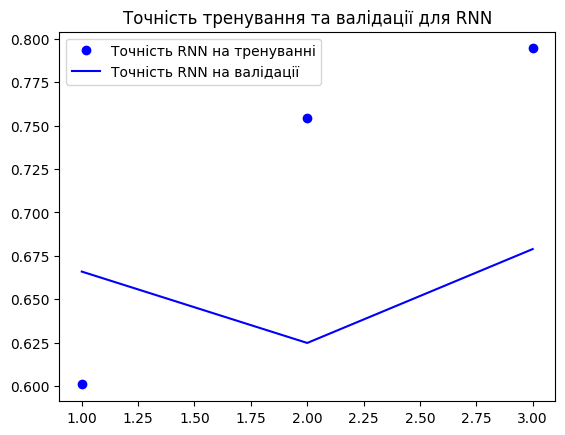

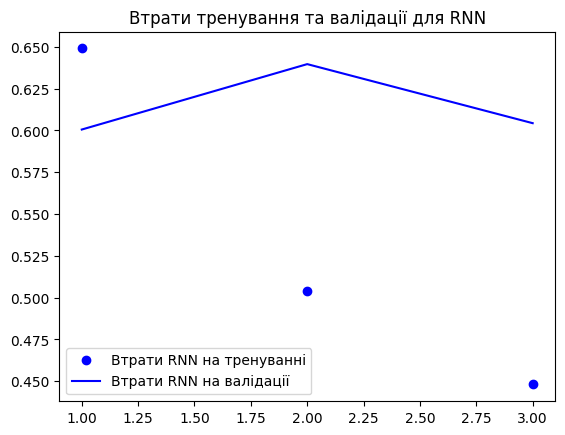

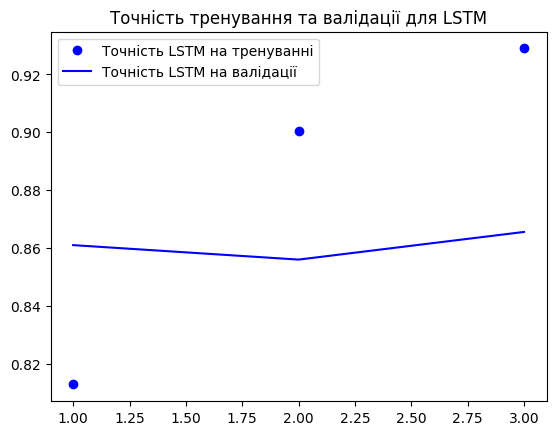

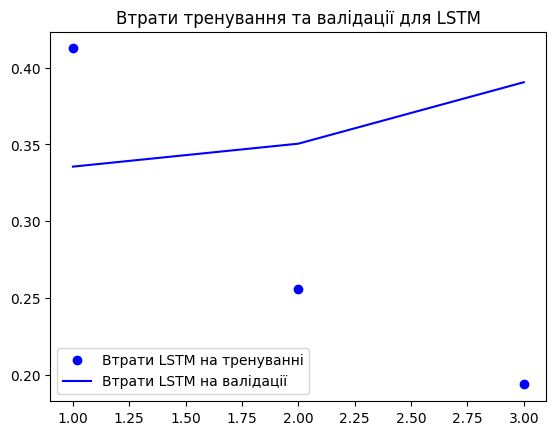

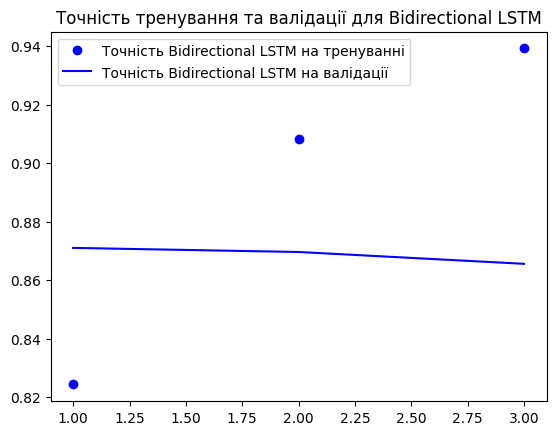

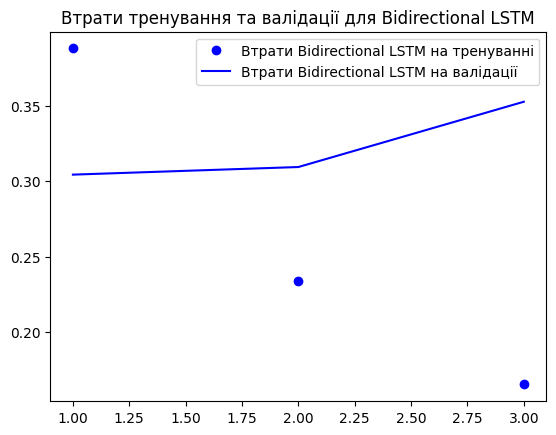

In [73]:
# Результати для кожної моделі
for name, history, _, _ in results:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Графік точності
    plt.figure()
    plt.plot(epochs, acc, 'bo', label=f'Точність {name} на тренуванні')
    plt.plot(epochs, val_acc, 'b', label=f'Точність {name} на валідації')
    plt.title(f'Точність тренування та валідації для {name}')
    plt.legend()

    # Графік втрат
    plt.figure()
    plt.plot(epochs, loss, 'bo', label=f'Втрати {name} на тренуванні')
    plt.plot(epochs, val_loss, 'b', label=f'Втрати {name} на валідації')
    plt.title(f'Втрати тренування та валідації для {name}')
    plt.legend()

plt.show()

In [74]:
# Порівняння прогнозів для кожної моделі
for model_info in models:
    model_name = model_info[0]
    model = model_info[1]

    # Отримання прогнозів для моделі
    predictions = model.predict(x_test)

    # Перетворення прогнозів в бінарний формат
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    print(f"Модель: {model_name}")

    # Виведення деяких прогнозованих значень поряд з фактичними значеннями
    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    # Оцінка моделі
    test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=64)
    print(f'Test Loss для {model_name}: {test_loss}')
    print(f'Test Accuracy для {model_name}: {test_acc * 100:.2f}%')

782/782 [==============================] - 18s 23ms/step
Модель: RNN
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
391/391 [==============================] - 16s 40ms/step - loss: 0.6044 - accuracy: 0.6789
Test Loss для RNN: 0.604351818561554
Test Accuracy для RNN: 67.89%
782/782 [==============================] - 92s 117ms/step
Модель: LSTM
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
391/391 [==============================] - 63s 162ms/step - loss: 0.3906 - accuracy: 0.8656
Test Loss для LSTM: 0.39056348